<a href="https://colab.research.google.com/github/saharshhhh/DeepLearning/blob/main/Warranty_Claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [3]:
data=pd.read_csv("/content/Warranty_Claim_Dataset.csv")

In [4]:
data

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,East,Tamil Nadu,Rural,Ranchi,Personal,Household,Refrigerator,0,0,0,0,1,18706,17,80,Online Store,0.8,Complaint,0
1,West,Jharkhand,Urban,Ranchi,Personal,Electronics,TV,0,0,0,1,0,46245,14,25,Manufacturer,3.0,Claim,0
2,West,Karnataka,Urban,Chennai,Business,Household,Microwave,0,0,1,0,0,12096,18,93,Dealer,4.7,Complaint,0
3,Central,Karnataka,Urban,Chennai,Business,Furniture,TV,1,1,0,1,1,9147,19,86,Dealer,2.7,Complaint,0
4,North East,Haryana,Rural,Mumbai,Personal,Entertainment,Refrigerator,1,1,0,1,1,15441,5,74,Dealer,3.4,Complaint,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100658,North,Delhi,Rural,Delhi,Personal,Furniture,Refrigerator,0,0,1,1,1,45503,10,21,Online Store,3.0,Complaint,0
100659,North East,Maharashtra,Rural,Delhi,Business,Electronics,TV,0,1,0,2,2,16989,14,85,Manufacturer,2.3,Claim,0
100660,North East,Tamil Nadu,Rural,Delhi,Business,Entertainment,AC,0,0,1,0,2,14069,5,118,Manufacturer,2.4,Claim,0
100661,Central,Jharkhand,Urban,Delhi,Personal,Household,Microwave,1,2,1,2,0,35455,7,101,Online Store,2.4,Claim,0


In [5]:
df=pd.DataFrame(data)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['Fraud'].value_counts()

,count
Fraud,
0,90697
1,9966


In [8]:
for col in df.columns:
  print(f"--- Value Counts for '{col}' ---")
  print(df[col].value_counts())
  print("\n")

--- Value Counts for 'Region' ---
Region
North         16910
South         16837
West          16825
Central       16813
North East    16679
East          16599
Name: count, dtype: int64


--- Value Counts for 'State' ---
State
Maharashtra    16897
Jharkhand      16889
Delhi          16804
Karnataka      16760
Haryana        16661
Tamil Nadu     16652
Name: count, dtype: int64


--- Value Counts for 'Area' ---
Area
Rural    50371
Urban    50292
Name: count, dtype: int64


--- Value Counts for 'City' ---
City
Mumbai        16912
Bangalore     16898
Delhi         16778
Ranchi        16757
Chandigarh    16711
Chennai       16607
Name: count, dtype: int64


--- Value Counts for 'Consumer_profile' ---
Consumer_profile
Personal    50381
Business    50282
Name: count, dtype: int64


--- Value Counts for 'Product_category' ---
Product_category
Furniture        25292
Entertainment    25197
Household        25120
Electronics      25054
Name: count, dtype: int64


--- Value Counts for 'Product_ty

In [9]:
for i in df.columns:
  print(f"{str(i)}",df[i].isnull().sum())

Region 0
State 0
Area 0
City 0
Consumer_profile 0
Product_category 0
Product_type 0
AC_1001_Issue 0
AC_1002_Issue 0
TV_2001_Issue 0
TV_2002_Issue 0
TV_2003_Issue 0
Claim_Value 0
Service_Centre 0
Product_Age 0
Purchased_from 0
Call_details 0
Purpose 0
Fraud 0


<Axes: xlabel='Region', ylabel='Claim_Value'>

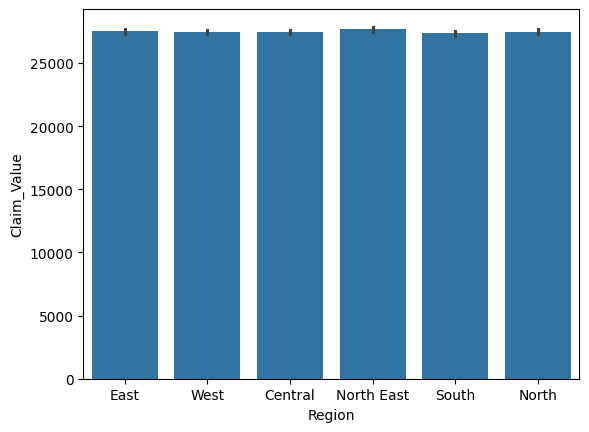

In [10]:
sns.barplot(x=df['Region'],y=df['Claim_Value'])

<Axes: xlabel='State', ylabel='Claim_Value'>

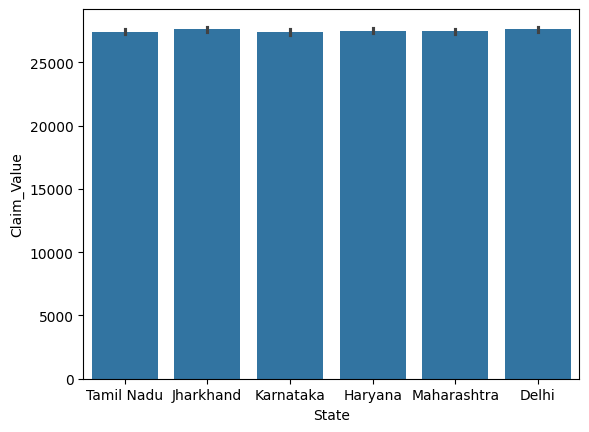

In [11]:
sns.barplot(x=df['State'],y=df['Claim_Value'])

<Axes: xlabel='Area', ylabel='Claim_Value'>

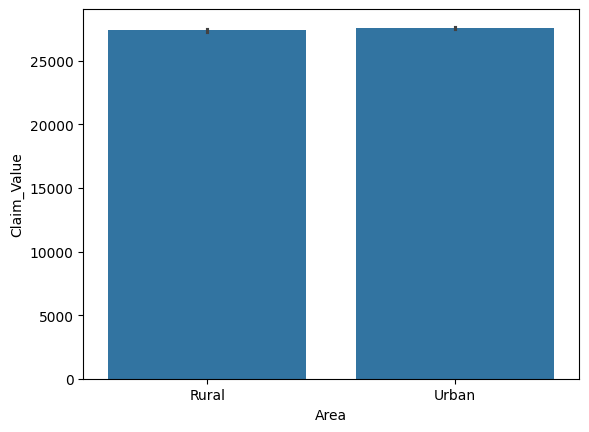

In [12]:
sns.barplot(x='Area',y='Claim_Value',data=df)

<Axes: xlabel='Fraud', ylabel='Region'>

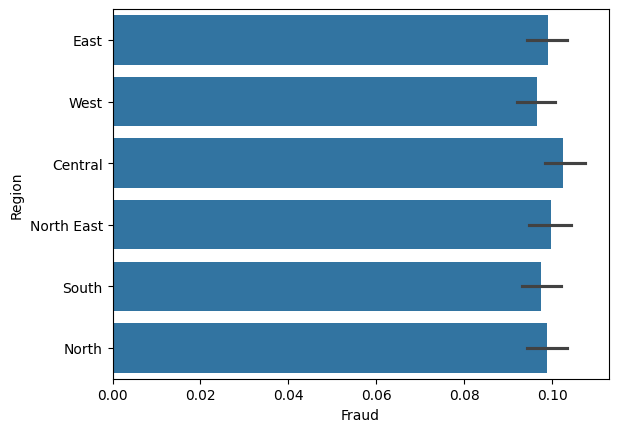

In [13]:
sns.barplot(x='Fraud',y='Region',data=df)

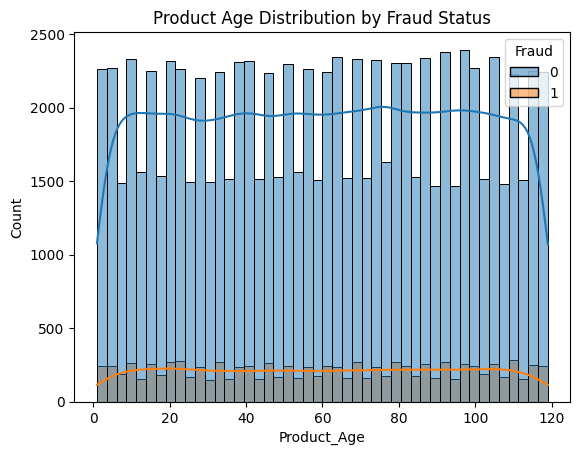

In [14]:

sns.histplot(data=df, x='Product_Age', hue='Fraud', kde=True)
plt.title('Product Age Distribution by Fraud Status')
plt.show()

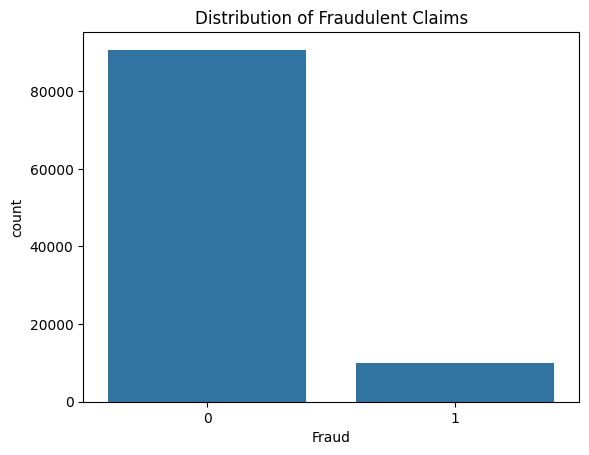

In [15]:
# Visualize the distribution of the target variable 'Fraud'
sns.countplot(x='Fraud', data=df)
plt.title('Distribution of Fraudulent Claims')
plt.show()

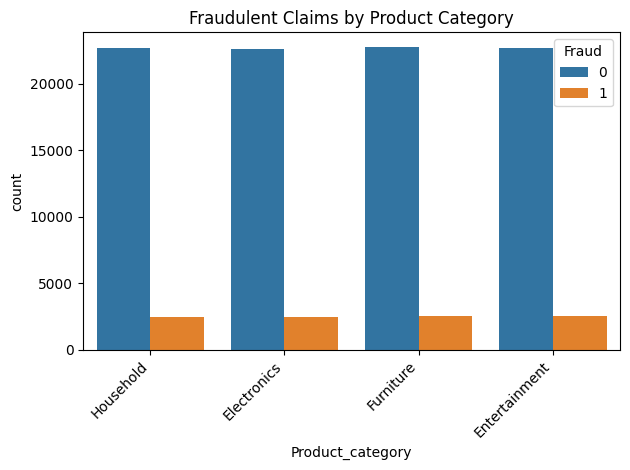

In [16]:
# Analyze warranty claims by product category
sns.countplot(x='Product_category', hue='Fraud', data=df)
plt.title('Fraudulent Claims by Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

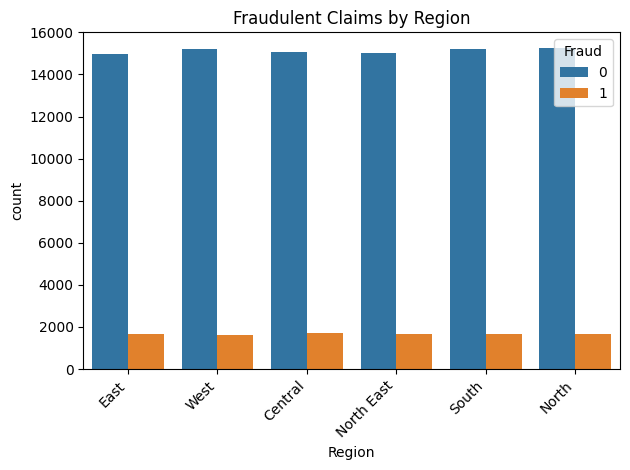

In [17]:
# Analyze warranty claims by region
sns.countplot(x='Region', hue='Fraud', data=df)
plt.title('Fraudulent Claims by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

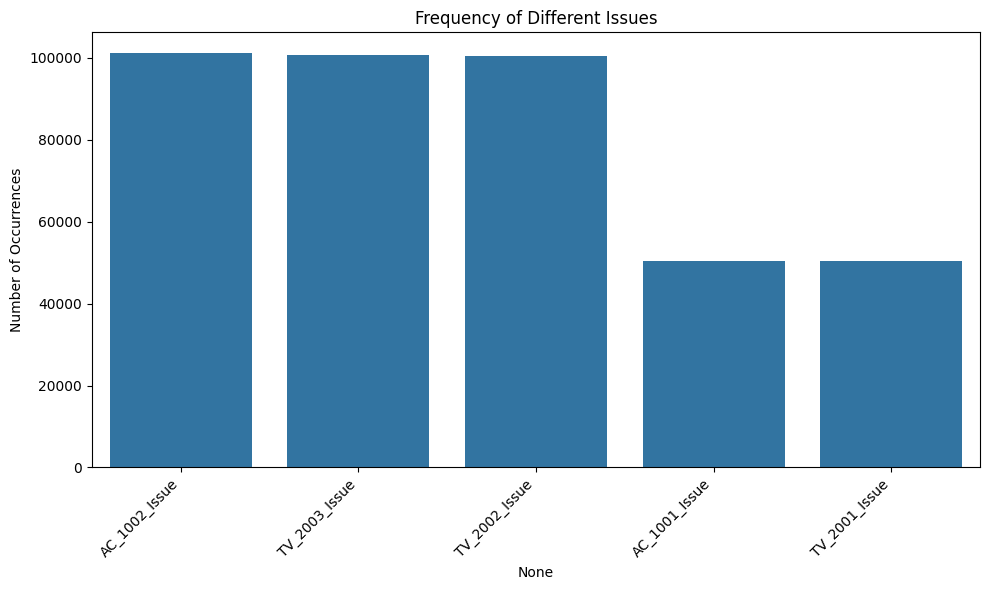

In [18]:
issue_cols = ['AC_1001_Issue', 'AC_1002_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue']
issue_counts = df[issue_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=issue_counts.index, y=issue_counts.values)
plt.title('Frequency of Different Issues')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Occurrences')
plt.tight_layout()
plt.show()

Issues by product type

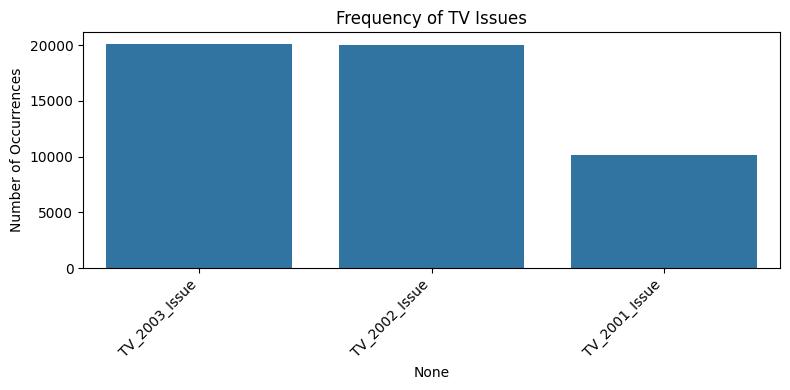

In [19]:
# And for TV issues:
tv_issues = df[df['Product_type'] == 'TV'][['TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue']]
tv_issue_counts = tv_issues.sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=tv_issue_counts.index, y=tv_issue_counts.values)
plt.title('Frequency of TV Issues')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Occurrences')
plt.tight_layout()
plt.show()

<Axes: xlabel='Fraud', ylabel='Consumer_profile'>

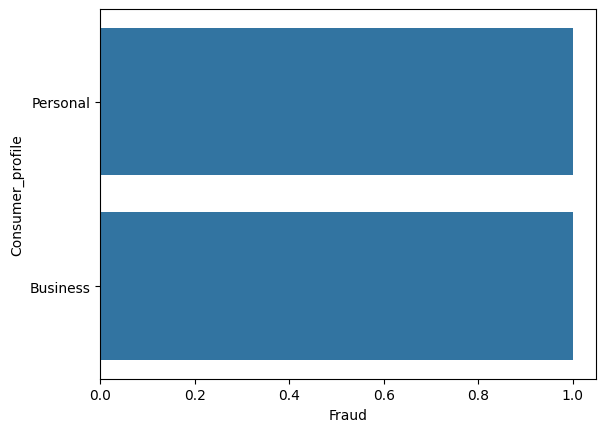

In [28]:
fraudulent_claims_df = df[df['Fraud'] == 1]
sns.barplot(y=fraudulent_claims_df['Consumer_profile'], x=fraudulent_claims_df['Fraud'])

In [29]:
df.shape

(100663, 19)

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_encoded=df.copy()
cat_cols=['Consumer_profile',	'Product_category',	'Product_type', 'Purchased_from', 'Purpose','Region',	'State',	'Area'	,'City']
for i in cat_cols:
  df_encoded[i] = le.fit_transform(df_encoded[i])
df_encoded.shape

(100663, 19)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_encoded['Claim_Value']=scaler.fit_transform(df_encoded[['Claim_Value']])

In [32]:
y=df_encoded['Fraud']
X=df_encoded.drop('Fraud',axis=1)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

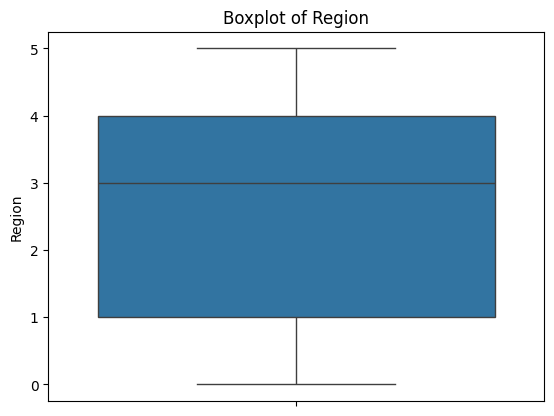

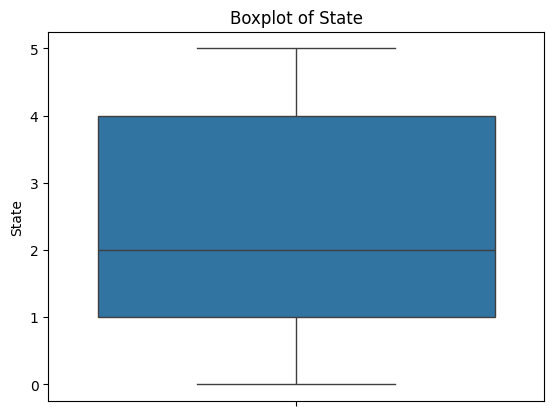

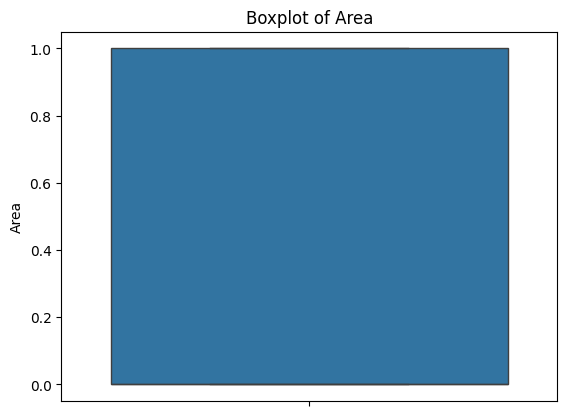

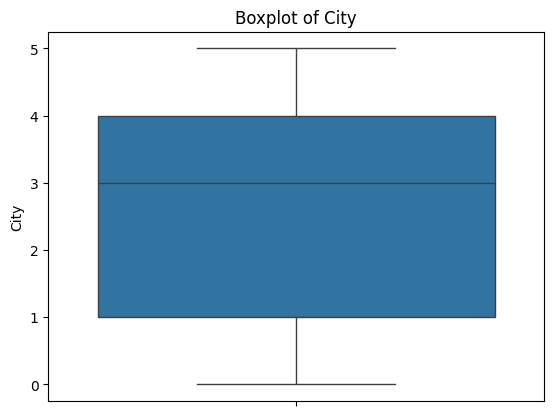

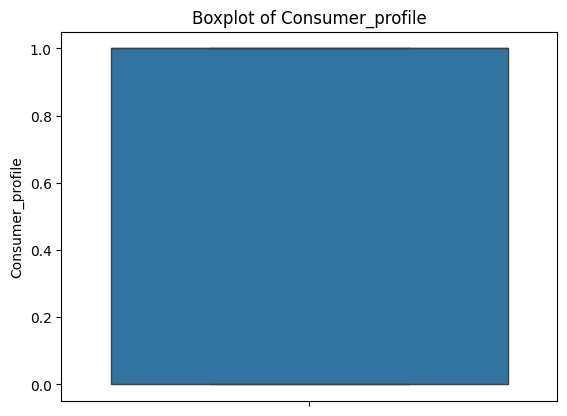

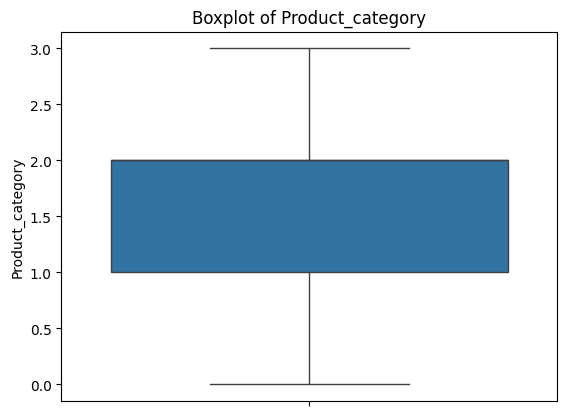

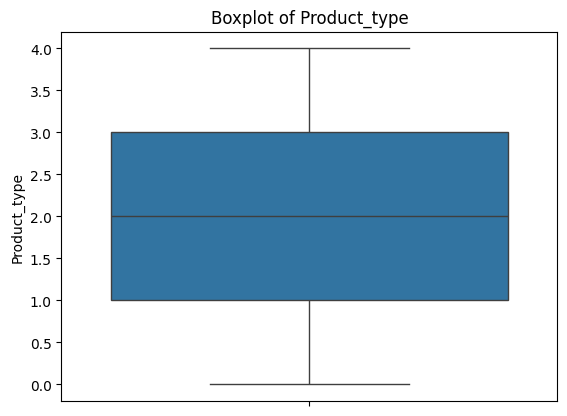

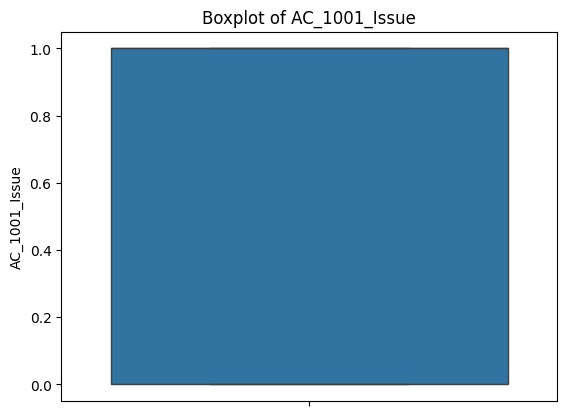

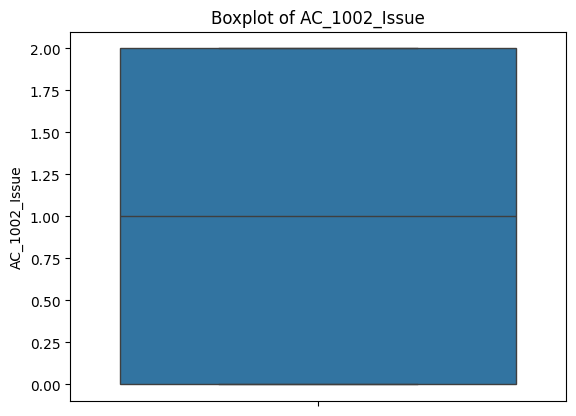

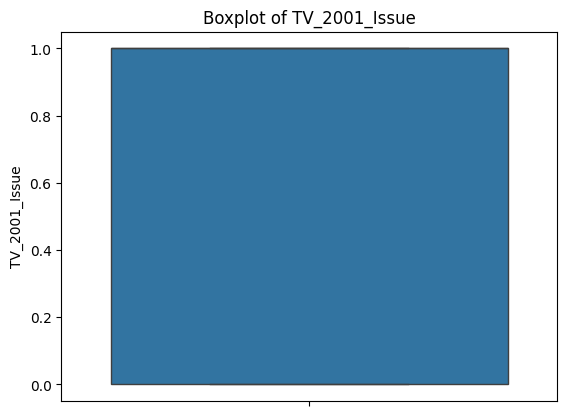

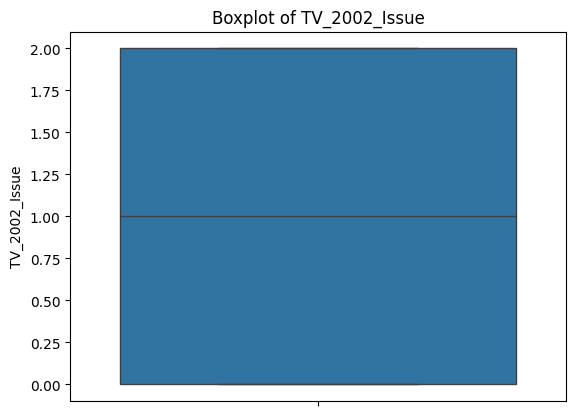

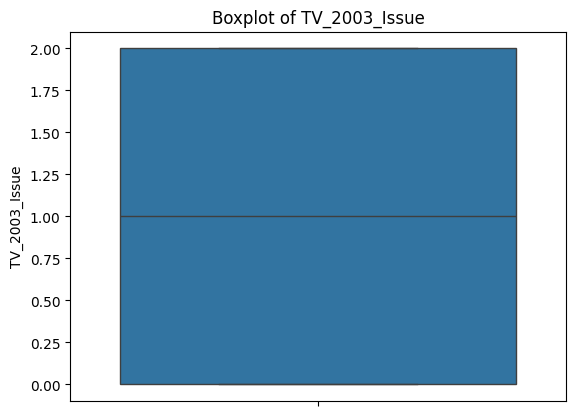

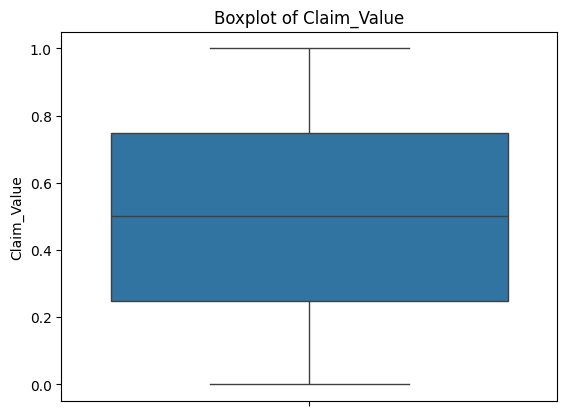

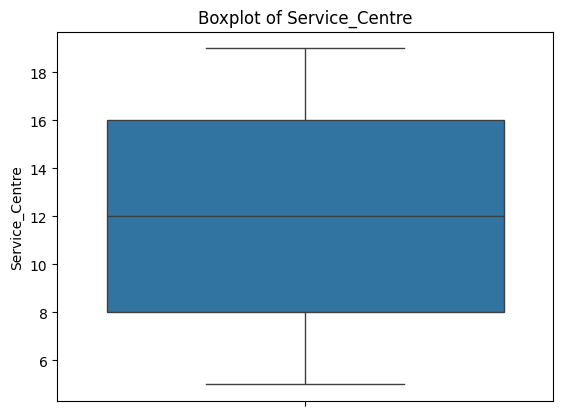

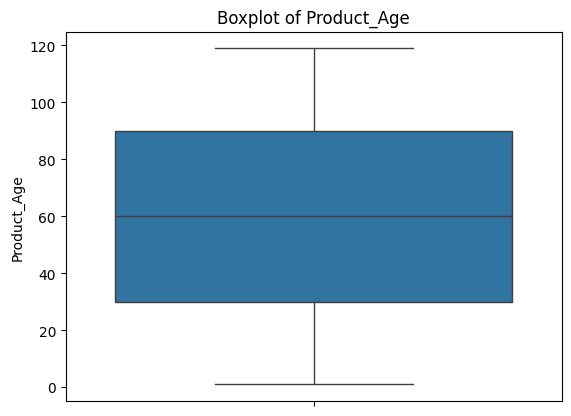

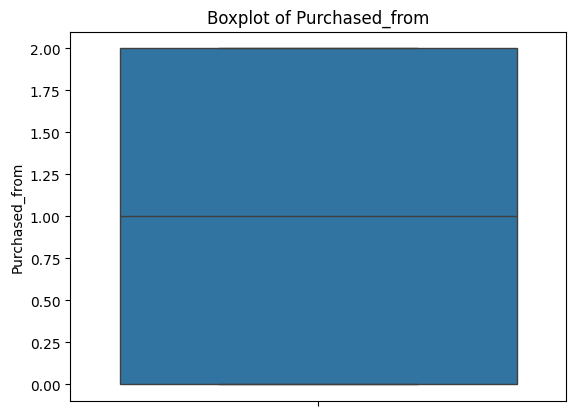

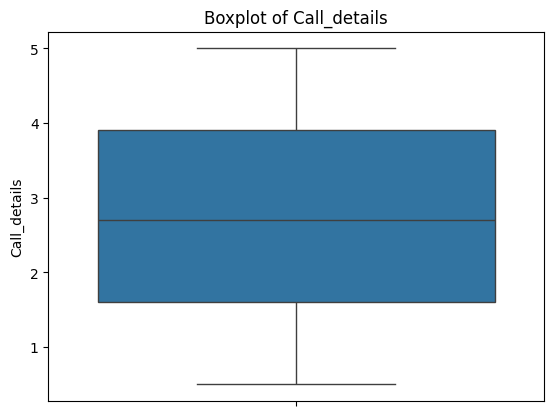

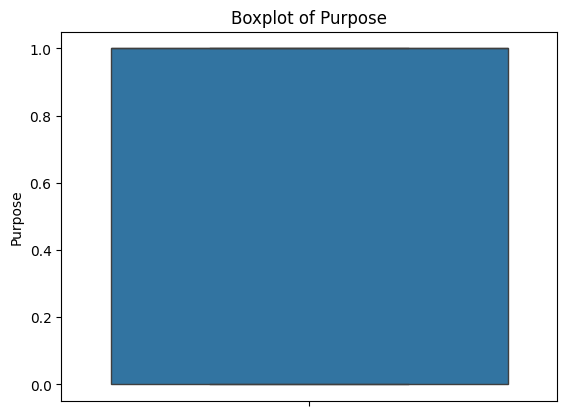

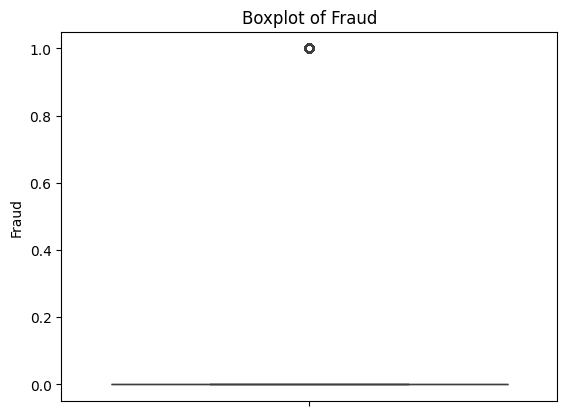

In [34]:
for i in df_encoded.columns:
  plt.figure()
  sns.boxplot(data=df_encoded[i])
  plt.title(f'Boxplot of {i}')
  plt.show()

In [37]:
from keras.layers import Dense,Dropout,LeakyReLU
model= Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation=LeakyReLU(negative_slope=0.01)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation=LeakyReLU(alpha=0.01)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [38]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)


In [39]:
model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
hist = model.fit(X, y, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/25
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8880 - loss: 0.3987 - val_accuracy: 0.8990 - val_loss: 0.3429
Epoch 2/25
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9005 - loss: 0.3324 - val_accuracy: 0.8990 - val_loss: 0.3313
Epoch 3/25
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9018 - loss: 0.3248 - val_accuracy: 0.8990 - val_loss: 0.3278
Epoch 4/25
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8996 - loss: 0.3281 - val_accuracy: 0.8990 - val_loss: 0.3272
Epoch 5/25
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9000 - loss: 0.3266 - val_accuracy: 0.8990 - val_loss: 0.3272
Epoch 6/25
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9016 - loss: 0.3225 - val_accuracy: 0.8990 - val_loss: 0.3272
Epoch 7/25
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9018 - loss: 0.3220 - val_accuracy: 0.8990 - val_loss: 0.3272
Epoch 8/25
2517/2517 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9020 - loss: 0.32

In [41]:
model.evaluate(X_test,y_test)

630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9030 - loss: 0.3185


[0.32210099697113037, 0.9013559818267822]

In [42]:
model.evaluate(X_train,y_train)

2517/2517 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8997 - loss: 0.3258


[0.3230936527252197, 0.900906503200531]

In [43]:
from sklearn.metrics import classification_report, roc_auc_score
y_proba = model.predict(X_test).flatten()

y_pred = (y_proba >= 0.5).astype(int)

print(classification_report(y_test, y_pred))

print("ROC AUC:", roc_auc_score(y_test, y_proba))


630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     18147
           1       0.00      0.00      0.00      1986

    accuracy                           0.90     20133
   macro avg       0.45      0.50      0.47     20133
weighted avg       0.81      0.90      0.85     20133

ROC AUC: 0.49732975430426607


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_res, y_res = smote.fit_resample(X_train_bal, y_train_bal)

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_final, y_final = rus.fit_resample(X_res, y_res)


In [45]:
model.fit(X_final, y_final, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

Epoch 1/50
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6213 - loss: 0.7379 - val_accuracy: 0.0000e+00 - val_loss: 1.0533
Epoch 2/50
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6257 - loss: 0.6625 - val_accuracy: 0.0000e+00 - val_loss: 1.0066
Epoch 3/50
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6246 - loss: 0.6621 - val_accuracy: 0.0000e+00 - val_loss: 1.0024
Epoch 4/50
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6235 - loss: 0.6626 - val_accuracy: 0.0000e+00 - val_loss: 0.9931
Epoch 5/50
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6275 - loss: 0.6603 - val_accuracy: 0.0000e+00 - val_loss: 0.9673
Epoch 6/50
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6249 - loss: 0.6617 - val_accuracy: 0.0000e+00 - val_loss: 0.9886
Epoch 7/50
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6268 - loss: 0.6606 - val_accuracy: 0.0000e+00 - val_loss: 0.9722
Epoch 8/50
1814/1814 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc

In [46]:
model.evaluate(X_test_bal,y_test_bal)

630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9020 - loss: 0.5185


[0.5189793109893799, 0.9010083079338074]

In [47]:
model.evaluate(X_train_bal,y_train_bal)

2517/2517 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9010 - loss: 0.5190


[0.5189540386199951, 0.9009934067726135]

In [54]:
y_proba = model.predict(X_test).flatten()

# Try threshold = 0.3
threshold = 0.6
y_pred_thresh = (y_proba >= threshold).astype(int)

from sklearn.metrics import classification_report, roc_auc_score
print(f"Threshold = {threshold}")
print(classification_report(y_test, y_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Threshold = 0.6
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     18147
           1       0.00      0.00      0.00      1986

    accuracy                           0.90     20133
   macro avg       0.45      0.50      0.47     20133
weighted avg       0.81      0.90      0.85     20133

ROC AUC: 0.49517697614496714


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
